# 8- MÉTRICAS

 La rápida expansión de NILM y el desarrollo de diferentes algoritmos, han hecho que sea esencial proporcionar una evaluación de rendimiento mediante el uso de métricas de desempeño. Las métricas de evaluación, comparan los resultados de la desagregaciónn (predicciones) de los modelos entrenados con los datos del set de validación (mediciones reales de cada proceso). NILMTK cuenta con el cálculo de métricas de evaluación mediante el uso del MeterGroup para la validación de los resultados mediante el set de validación 
 Vamos ahora analizar en nuestro dataset diferentes metricas como son FEAC,F1, EAE ,MNEAP y RMSE  que  resumimos a continuacion en el siguinte cuadro:

![metricas](metricas.jpg)

En primer lugar cargamos las ibrerías y realizamos otros ajustes:

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

from nilmtk import TimeFrame, MeterGroup, HDFDataStore, DataSet
from nilmtk.metrics import fraction_energy_assigned_correctly, mean_normalized_error_power
from nilmtk.metrics import rms_error_power, f1_score, error_in_assigned_energy

data_dir='./data/'

### Métricas individuales del modelo

In [5]:
#Librerías
from nilmtk.metrics import f1_score
from nilmtk.metrics import error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power
from nilmtk.metrics import rms_error_power
from nilmtk.metrics import fraction_energy_assigned_correctly

In [19]:

labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})


 

#Set para validación
valid = DataSet('dsualmh.h5')
valid.set_window(start="2023-03-07 12:10:00", end="2023-03-07 12:41:00")
valid_elec = valid.buildings[1].elec

print('Medidor de cabecera para desagregación:')
valid_Main = valid_elec.mains()
print(valid_Main)

print('\nDispositivos para validación de entrenamiento:')
valid_Devices = valid_elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
print(valid_Devices)




index = list(labels['Meters'][1:11])
met = []
e = []


#EL MEJOR ES FHMM 60 SEG

#Datos de Dispositivos: predicción  FHMM
#periods = { '35s':35, '60s':60, '5min':60*5, '10min':60*10}

#dataset=DataSet(data_dir+'NILM/Results/FHMM_35s_first_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.233	0.000	0.632	0.333	0.267	0.290	0.000	0.578	0.531	0.486
#EAE	0.066	0.092	0.004	0.100	0.113	0.076	0.036	0.001	0.002	0.005
#MNEAP	1.321	4.036	0.555	1.772	3.070	1.310	1.622	0.512	0.860	0.764
#RMSE	813.520	597.387	21.351	911.898	432.101	988.123	636.106	16.004	50.139	28.340



dataset=DataSet(data_dir+'NILM/Results/FHMM_60s_first_pred.h5')  #mejor caombinacion
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.229	0.062	0.606	0.121	0.176	0.176	0.143	0.519	0.591	0.410
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.185	3.618	0.576	1.714	2.094	1.258	2.275	0.623	0.665	0.742
#RMSE	741.077	312.334	20.639	546.771	218.454	896.857	733.203	17.190	34.358	28.030



#dataset=DataSet(data_dir+'NILM/Results/FHMM_60s_mean_pred.h5')  #peor
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.229	0.000	0.556	0.154	0.176	0.176	0.200	0.621	0.370	0.410
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.187	3.363	0.672	1.751	2.102	1.285	1.883	0.491	0.811	0.743
#RMSE	740.492	457.833	21.546	741.205	218.785	890.742	609.811	13.708	45.738	27.580

#dataset=DataSet(data_dir+'NILM/Results/FHMM_60s_median_pred.h5')  # peor
#Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.229	0.062	0.588	0.121	0.176	0.176	0.154	0.538	0.591	0.410
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.186	3.608	0.553	1.745	2.094	1.292	2.100	0.617	0.647	0.742
#RMSE	740.686	311.707	20.135	548.464	218.454	889.334	700.789	17.143	33.161	28.030





#dataset=DataSet(data_dir+'NILM/Results/FHMM_5min_first_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.727	1.710	0.373	1.932	1.483	0.667	0.964	0.226	0.600	0.734
#RMSE	438.311	172.978	10.829	519.063	170.282	400.247	241.407	5.661	30.039	28.245



#dataset=DataSet(data_dir+'NILM/Results/FHMM_10min_first_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.982	0.924	0.447	1.363	1.084	0.596	0.691	0.181	0.600	0.734
#RMSE	440.672	132.695	12.320	385.279	104.484	336.998	189.104	3.873	29.731	22.928





#dataset=DataSet(data_dir+'NILM/Results/CO_1s_first_pred.h5')
#Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.428	0.117	0.697	0.287	0.246	0.439	0.308	0.522	0.511	0.428
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.214	4.056	0.667	1.119	2.255	1.003	1.741	0.847	3.705	5.057
#RMSE	974.404	558.082	23.151	731.294	334.550	1001.271	635.497	21.679	307.709	275.889



#dataset=DataSet(data_dir+'NILM/Results/CO_1s_mean_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.428	0.117	0.697	0.287	0.246	0.439	0.308	0.522	0.511	0.428
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.214	4.056	0.667	1.119	2.255	1.003	1.741	0.847	3.705	5.057
#RMSE	974.404	558.082	23.151	731.294	334.550	1001.271	635.497	21.679	307.709	275.889


#dataset=DataSet(data_dir+'NILM/Results/CO_1s_median_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.428	0.117	0.697	0.287	0.246	0.439	0.308	0.522	0.511	0.428
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.214	4.056	0.667	1.119	2.255	1.003	1.741	0.847	3.705	5.057
#RMSE	974.404	558.082	23.151	731.294	334.550	1001.271	635.497	21.679	307.709	275.889




#dataset=DataSet(data_dir+'NILM/Results/CO_35s_first_pred.h5')
#Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.061	0.657	0.158	0.154	0.000	0.421	0.525	0.459	0.000
#EAE	0.246	0.060	0.001	0.194	0.083	0.274	0.222	0.002	0.005	0.016
#MNEAP	1.000	3.247	0.576	2.504	3.016	1.000	2.094	0.814	1.006	1.000
#RMSE	934.841	436.967	22.229	1092.728	424.086	1112.618	726.598	21.136	56.483	40.305


#dataset=DataSet(data_dir+'NILM/Results/CO_60s_first_pred.h5')
#Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.000	0.708	0.000	0.000	0.000	0.231	0.550	0.000	0.000
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.000	1.000	0.437	1.000	1.000	1.000	2.959	0.606	1.000	1.000
#RMSE	881.447	256.102	17.708	600.323	226.004	1026.863	850.140	16.666	53.534	39.728




#dataset=DataSet(data_dir+'NILM/Results/CO_5min_first_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.000	0.0	0.000	0.000	0.000	0.000	0.00	0.00	0.000
#EAE	0.000	0.000	0.0	0.000	0.000	0.000	0.000	0.00	0.00	0.000
#MNEAP	1.000	1.000	1.0	1.000	1.000	1.000	1.000	1.00	1.00	1.000
#RMSE	565.425	190.747	27.4	484.436	193.314	670.383	336.871	21.03	48.42	34.852












predictions=dataset.buildings[1].elec.submeters()      

#Metricas
f1 = {};
eae = {};
feac = {};
mneap = {};
rmse = {};



f1['F1'] = f1_score(predictions, valid_Devices)

EAE = error_in_assigned_energy(predictions, valid_Devices)

for x in range(len(EAE)): e.append(EAE.iloc[x][0])
eae['EAE'] = e
#da error esta medida AttributeError: 'tuple' object has no attribute 'instance'
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                      pd.DataFrame(f1),
                      pd.DataFrame(eae, index=valid_Devices.instance()),
                      pd.DataFrame(mneap),
                      pd.DataFrame(rmse)],
                     axis=1).set_index(pd.Index(index)))

dataset.store.close()       
print('\n\nDone!')
metrics=met[0].transpose().round(3)
metrics

Medidor de cabecera para desagregación:
ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Dispositivos para validación de entrenamiento:
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(ins

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
F1,0.229,0.062,0.606,0.121,0.176,0.176,0.143,0.519,0.591,0.410
EAE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
MNEAP,1.185,3.618,0.576,1.714,2.094,1.258,2.275,0.623,0.665,0.742
RMSE,741.077,312.334,20.639,546.771,218.454,896.857,733.203,17.190,34.358,28.030


Carga de datos de predicciones y GT en memoria

In [20]:
gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=1, resample_kwargs={'how':'first'})


labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})


Meters={}
for x in range(len(labels)): Meters[valid_elec[x+1]]=labels['Meters'][x]
    

    
    
#resultados de predicción modelo CO 60s
CO_60s_first=DataSet(data_dir+'NILM/Results/CO_60s_first_pred.h5')
elec_CO_60s_first=CO_60s_first.buildings[1].elec

#resultados de predicción modelo FHMM 60s
FHMM_60s_first=DataSet(data_dir+'NILM/Results/FHMM_60s_first_pred.h5')
elec_FHMM_60s_first= FHMM_60s_first.buildings[1].elec    
    
    

gt.columns=list(Meters.values())
pred_CO=elec_CO_60s_first.dataframe_of_meters(ac_type='active')

pred_CO.columns=[list(Meters.values())[0]]+list(Meters.values())[1:12]

pred_FHMM=elec_FHMM_60s_first.dataframe_of_meters(ac_type='active')

pred_FHMM.columns=[list(Meters.values())[0]]+list(Meters.values())[1:12]

### Análisis particular del cálculo de cada métrica

Metrica FEAC ( da problema con AttributeError: 'tuple' object has no attribute 'instance')

In [21]:
#Carga de datos de predicciones y GT en memoria
#gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=60, resample_kwargs={'how':'first'})
#gt.columns=list(Meters.values())

In [22]:
#predictions_Devices=elec_CO_60s_first.submeters()

#frac_1 = valid_Devices.fraction_per_meter()
#frac_2 = predictions_Devices.fraction_per_meter()
#fig, (ax1, ax2) = plt.subplots(1, 2 ,gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

#frac_1.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',labels=list(Meters.values())[1:6], figsize=(8,8), ax=ax1,   colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan'])
#frac_2.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',  labels=list(Meters.values())[1:6], figsize=(8,8), ax=ax2,  colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']) 

#ax1.set(ylabel="")
#ax1.set(xlabel="GT")
#ax2.set(ylabel="")
#ax2.set(xlabel="Predictions")
#plt.savefig('./data/images/5.4_FEAC_CO_60s.svg', bbox_inches='tight', transparent=True)
#pass

## Métrica F1

Esta métrica mide la precisión o asertividad del modelo entrenado mediante el cálculo de la media armónica utilizando las métricas Precision y Recall. Estas métricas son calculadas internamente por NILMTK mediante la matriz de confusión, vease la ecuación de la figura siguiente.

![metricas](metricas.jpg)

Precision se entiende como la fracción de cortes de tiempo en los que se predijo correctamente que un proceso estaba activo, pero realmente se encontraba apagado. Por lo contrario, Recall hace referencia a la fracción de cortes de tiempo en los que se predijo correctamente que el dispositivo estaba encendido y realmente se encontraba encendido .

In [23]:
pd.DataFrame(metrics.loc['F1']).transpose()*100

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
F1,22.9,6.2,60.6,12.1,17.6,17.6,14.3,51.9,59.1,41.0


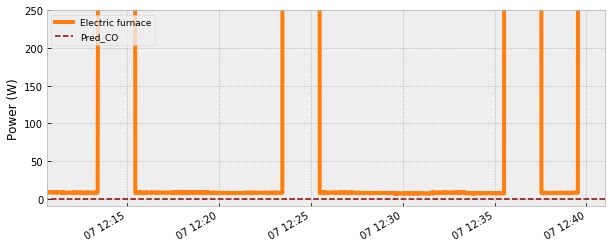

In [25]:
rcParams['figure.figsize'] = (10, 4)

t0='2023-03-07 12:10:38+01:00' #tiempo inicial
t1='2023-03-07 12:41:00+01:00' #tiempo final


fig, ax1 = plt.subplots();
ax1=gt['Electric furnace'].plot(lw=4, c='tab:orange')
pred_CO['Electric furnace'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric furnace','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

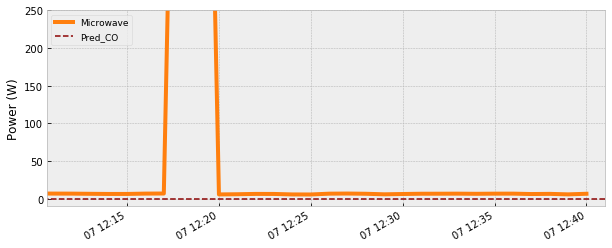

In [100]:
rcParams['figure.figsize'] = (10, 4)


fig, ax1 = plt.subplots();
ax1=gt['Microwave'].plot(lw=4, c='tab:orange')
pred_CO['Microwave'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Microwave','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

       

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

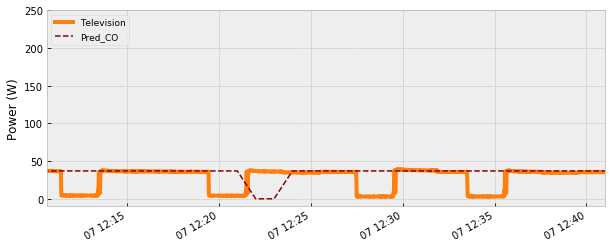

In [26]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Television'].plot(lw=4, c='tab:orange')
pred_CO['Television'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Television','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

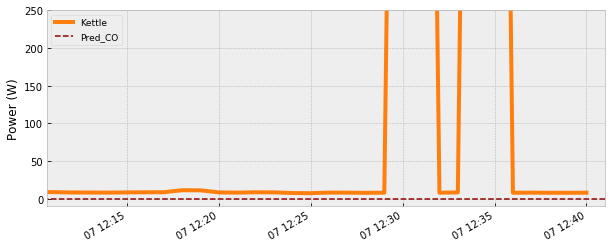

In [102]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Kettle'].plot(lw=4, c='tab:orange')
pred_CO['Kettle'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Kettle','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

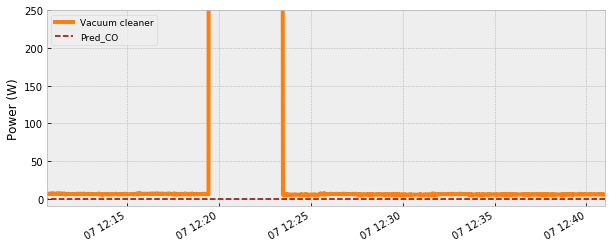

In [27]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Vacuum cleaner'].plot(lw=4, c='tab:orange')
pred_CO['Vacuum cleaner'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Vacuum cleaner','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

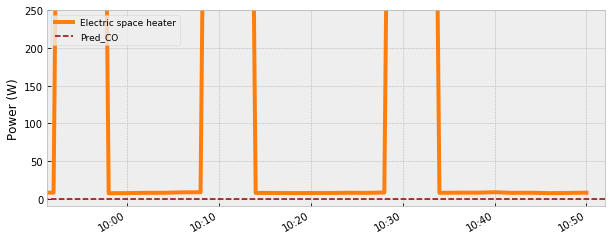

In [104]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Electric space heater'].plot(lw=4, c='tab:orange')
pred_CO['Electric space heater'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric space heater','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()
ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')




plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

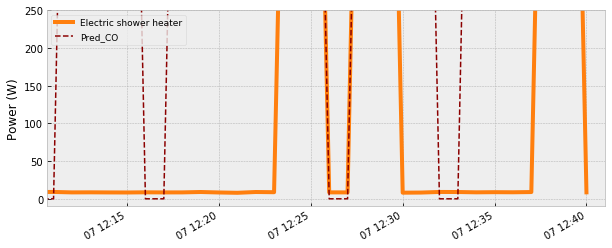

In [105]:
rcParams['figure.figsize'] = (10, 4)


fig, ax1 = plt.subplots();
ax1=gt['Electric shower heater'].plot(lw=4, c='tab:orange')
pred_CO['Electric shower heater'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric shower heater','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

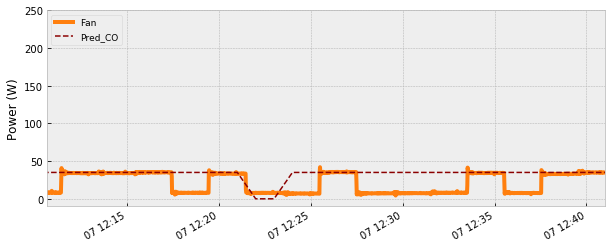

In [28]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Fan'].plot(lw=4, c='tab:orange')
pred_CO['Fan'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Fan','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

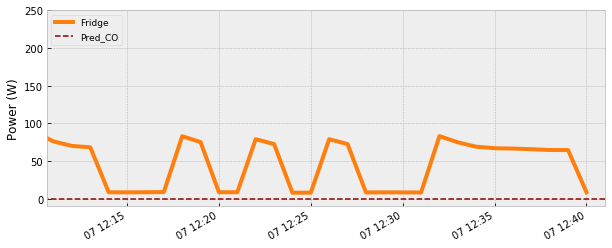

In [107]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Fridge'].plot(lw=4, c='tab:orange')
pred_CO['Fridge'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Fridge','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

         

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

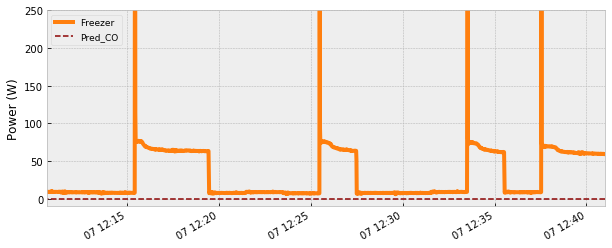

In [29]:
rcParams['figure.figsize'] = (10, 4)
fig, ax1 = plt.subplots();
ax1=gt['Freezer'].plot(lw=4, c='tab:orange')
pred_CO['Freezer'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Freezer','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()
ax1.set_ylabel('Power (W)')




plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

## Métrica EAE

La ecuación de la figura representa la diferencia entre la energía total asignada yˆt(n) energía total consumida yt(n) por el proceso n de la industria en kWh 

![metricas](metricas.jpg)

In [30]:
round(pd.DataFrame(metrics.loc['EAE']).transpose(),2)

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
EAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
predictions_Devices=elec_CO_60s_first.submeters()
e1=predictions_Devices[10].total_energy()[0]
e2=valid_Devices[10].total_energy()[0]
eae=round(abs(e1-e2),2)

pd.DataFrame([e1,e2,eae], columns=['kWh'], index=['Energy_pred','Energy_GT','EAE'])

,kWh
Energy_pred,0.002683
Energy_GT,0.002683
EAE,0.000000


## Métrica MNEAP

Este indicador que representa la ecuacion de la imagen  consta de la diferencia entre la potencia asignada yˆt(n) y la potencia real yt(n) de cada proceso de la industria, por cada intervalo de tiempo t. Después de sumar todas las diferencias de potencia, el resultado es normalizado por el consumo total de la energía del proceso 

![metricas](metricas.jpg)

In [32]:
round(pd.DataFrame(metrics.loc['MNEAP']).transpose(),2)

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
MNEAP,1.18,3.62,0.58,1.71,2.09,1.26,2.28,0.62,0.66,0.74


## Métrica RMSE

Esta métrica de la ecuación de la figura es muy utilizada en la comparaciónn de diversos conjuntos de datos, consiste en el error cuadrático medio de la diferencia entre la potencia asignada yˆt(n) y la potencia real yt(n) del proceso de los applicativos , en cada intervalo de tiempo t .

![metricas](metricas.jpg)

In [33]:
round(pd.DataFrame(metrics.loc['RMSE']).transpose(),1)

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
RMSE,741.1,312.3,20.6,546.8,218.5,896.9,733.2,17.2,34.4,28.0


## Resultados de todos los modelos

In [34]:
from nilmtk.metrics import fraction_energy_assigned_correctly, f1_score, error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power, rms_error_power 
periods = { '60s':60, '5min':60*5, '10min':60*10}

dir_predictions = data_dir +'NILM/Results/'
m = {}
classifiers = ['CO', 'FHMM']
methods = ['first', 'mean', 'median']
index = list(labels['Meters'][1:12])

for p_name, sp in periods.items():
    met = []
    for method in methods:
        for clf_name in classifiers:
            print('\nCalculando Metricas: '+ clf_name + '_' + p_name + '_' + method)  
           
            #Datos de Dispositivos: predicción
            input_dir = dir_predictions + clf_name + '_' + p_name + '_' + method +'_pred.h5'
            dataset = DataSet(input_dir)
            predictions=dataset.buildings[1].elec.submeters()       
            
            #Metricas
            f1 = {};
            eae = {};
            feac = {};
            mneap = {};
            rmse = {};
            e=[];  
            
            
            F1 = f1_score(predictions, valid_Devices)
            f1['F1'] = F1*100
            EAE = error_in_assigned_energy(predictions, valid_Devices)
            
            for x in range(len(EAE)): e.append(EAE.iloc[x][0])
            eae['EAE'] = e
            #da error para FEAC
            #feac['FEAC'] = 100*np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
            mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
            rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
            met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                                  pd.DataFrame(f1),
                                  pd.DataFrame(eae, index=valid_Devices.instance()),
                                  pd.DataFrame(mneap),
                                  pd.DataFrame(rmse)],
                                 axis=1).set_index(pd.Index(index)))
            dataset.store.close()        
    m[p_name] = met

##Guardamos resultados
f = open(data_dir +'NILM/metrics.txt',"w")
f.write( str(m) )
f.close()
print('\n\nDone!')




Calculando Metricas: CO_60s_first

Calculando Metricas: FHMM_60s_first

Calculando Metricas: CO_60s_mean

Calculando Metricas: FHMM_60s_mean

Calculando Metricas: CO_60s_median

Calculando Metricas: FHMM_60s_median

Calculando Metricas: CO_5min_first

Calculando Metricas: FHMM_5min_first

Calculando Metricas: CO_5min_mean

Calculando Metricas: FHMM_5min_mean

Calculando Metricas: CO_5min_median

Calculando Metricas: FHMM_5min_median

Calculando Metricas: CO_10min_first

Calculando Metricas: FHMM_10min_first

Calculando Metricas: CO_10min_mean

Calculando Metricas: FHMM_10min_mean

Calculando Metricas: CO_10min_median

Calculando Metricas: FHMM_10min_median


Done!


## Otras Metricas: métricas Promedio

In [35]:
m_mean = {}

#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']
labels=['CO-first', 'CO-mean', 'CO-median', 'FHMM-first', 'FHMM-mean' ,'FHMM-median']
per=['60s','5min','10min']

for c in cols:
    m_mean[c] = pd.DataFrame([#CO FIRST
                             [m['60s'][0][c].mean(),
                              m['5min'][0][c].mean(),m['10min'][0][c].mean()],
                              #CO MEAN
                             [m['60s'][2][c].mean(),
                              m['5min'][2][c].mean(),m['10min'][2][c].mean()],
                              #CO MEDIAN
                             [m['60s'][4][c].mean(),
                              m['5min'][4][c].mean(),m['10min'][4][c].mean()],
                             #FHMM FIRST
                             [m['60s'][1][c].mean(),
                             m['5min'][1][c].mean(),m['10min'][1][c].mean()],
                             #FHMM MEAN            
                             [m['60s'][3][c].mean(),
                              m['5min'][3][c].mean(),m['10min'][3][c].mean()],
                             #FHMM MEDIAN
                             [m['60s'][5][c].mean(),
                              m['5min'][5][c].mean(),m['10min'][5][c].mean()]],columns=per, index=labels).transpose()
m_mean



{'F1':         CO-first    CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 60s    14.891026  19.047619  15.323635   30.338265  28.922308    30.469332
 5min    0.000000   0.000000   0.000000    0.000000   0.000000     0.000000
 10min   0.000000   0.000000   0.000000    0.000000   0.000000     0.000000,
 'EAE':        CO-first  CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 60s         0.0      0.0        0.0         0.0        0.0          0.0
 5min        0.0      0.0        0.0         0.0        0.0          0.0
 10min       0.0      0.0        0.0         0.0        0.0          0.0,
 'MNEAP':        CO-first   CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 60s    1.100252  1.633417   1.126496    1.475023   1.428703     1.458553
 5min   1.000000  1.000000   1.000000    0.941538   1.011431     0.752507
 10min  1.000000  1.000000   1.000000    0.760147   0.728643     0.798384,
 'RMSE':          CO-first     CO-mean   CO-median  FHMM-first   FHMM-mean  FHMM-me

## Maximos


In [36]:
cols=['F1','EAE','MNEAP','RMSE']

maxs=pd.concat([m_mean['F1'].transpose().max(),
                m_mean['EAE'].transpose().min(),
                m_mean['MNEAP'].transpose().min(),
                m_mean['RMSE'].transpose().min()], axis=1)
maxs.columns=cols
maxs = maxs.transpose()
round(maxs,2)

,60s,5min,10min
F1,30.47,0.00,0.00
EAE,0.00,0.00,0.00
MNEAP,1.10,0.75,0.73
RMSE,350.79,197.54,122.27


## Correspondencia de Indice

In [37]:
cols=['F1','EAE','MNEAP','RMSE']

maxs_i=pd.concat([m_mean['F1'].transpose().idxmax(),
                 m_mean['EAE'].transpose().idxmin(),
                 m_mean['MNEAP'].transpose().idxmin(),
                 m_mean['RMSE'].transpose().idxmin()], axis=1)
maxs_i.columns=cols
maxs_i = maxs_i.transpose()
maxs_i

,60s,5min,10min
F1,FHMM-median,CO-first,CO-first
EAE,CO-first,CO-first,CO-first
MNEAP,CO-first,FHMM-median,FHMM-mean
RMSE,FHMM-median,FHMM-mean,FHMM-mean


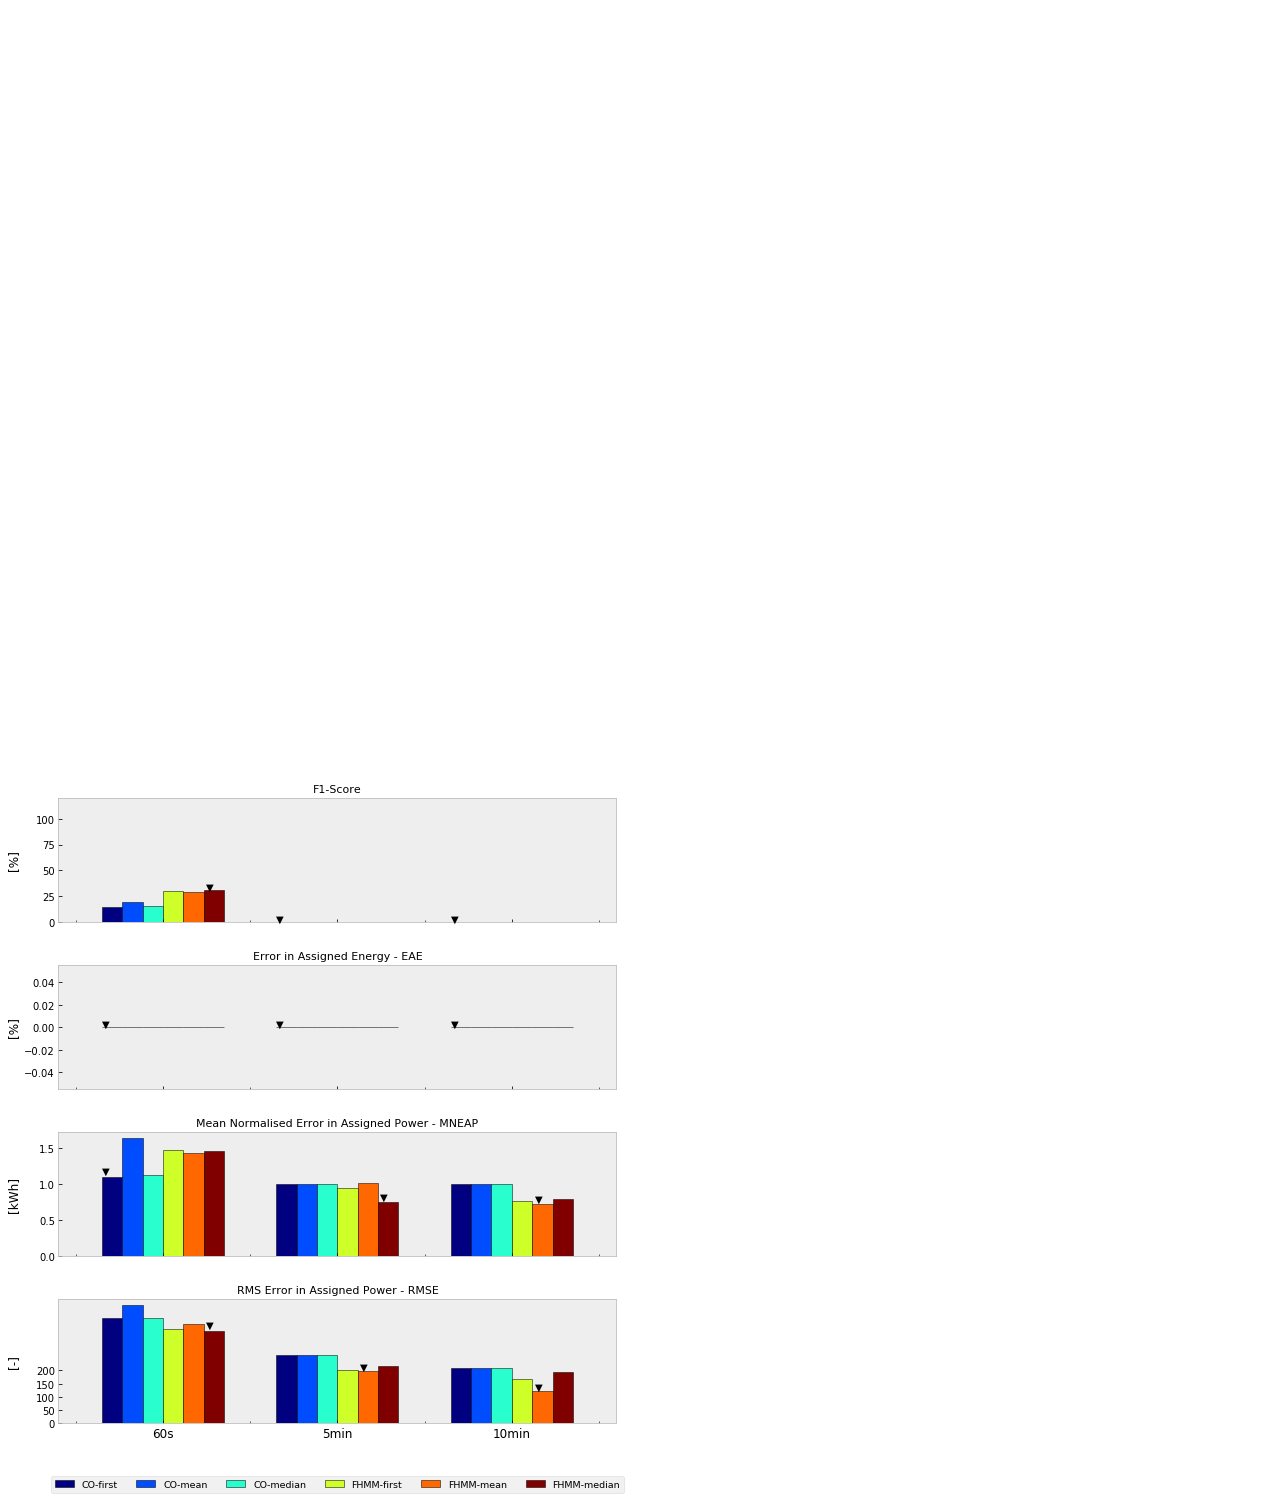

In [38]:
rcParams['figure.figsize'] = (10, 11.5)
fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0.35})
cols=['F1','EAE','MNEAP','RMSE']
ylabels=['[%]','[%]','[kWh]','[-]','[W]']
per=['60s','5min','10min']

labels={'CO-first':-0.35, 'CO-mean':-0.22, 'CO-median':-0.11, 'FHMM-first':0.01, 'FHMM-mean':0.13 ,'FHMM-median':0.245}

c=0
for ax in fig.get_axes():      
    m_mean[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, cmap="jet")
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    x = 0
    for p in per:
        ax.annotate("▼", xy=(labels[maxs_i[p][cols[c]]]+x, maxs[p][cols[c]]+maxs[p][cols[c]]*0.03))
        x+=1
    c+=1
    
ax5.set_xticklabels(labels=per, rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax2,ax3,ax4,ax5)])
ax2.set(ylim=(0,120))
ax2.set_yticks([0,25,50,75,100])

ax5.set_yticks([0,50,100,150,200])

ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels.keys(), loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.6),fontsize=9.5)


#ax2.annotate("90.5%", xy=(0.68, 98)); #30s FHMM-mean
#ax3.annotate("0.19", xy=(6.22, 1.4)); #30min FHMM-median
ax3.annotate("kWh", xy=(6.22, 0.9)); #30min FHMM-median
#ax4.annotate("0.24", xy=(6.22, 0.7)); #30min FHMM-median
#ax5.annotate("41.5", xy=(6.22, 120)); #30min FHMM-median
ax5.annotate("   W", xy=(6.22, 90)); #30min FHMM-median


plt.savefig('./data/images/5.7_All_metrics.svg', bbox_inches='tight', transparent=True)

pass

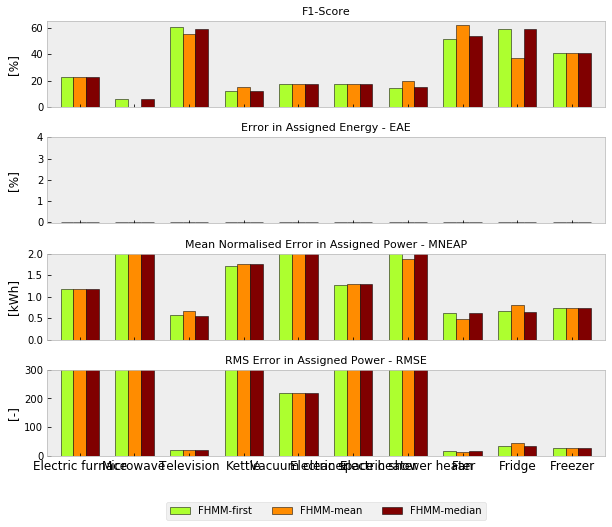

In [39]:
rcParams['figure.figsize'] = (10, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})

#cols=['FEAC','F1','EAE','MNEAP','RMSE']
cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']
labels=['FHMM-first', 'FHMM-mean' ,'FHMM-median']
c=0

for ax in fig.get_axes():
    
    df=pd.DataFrame([m['60s'][1][cols[c]],m['60s'][3][cols[c]],m['60s'][5][cols[c]]]).transpose()
    #if ax==ax1:
    #    df['FEAC'].mean().plot.barh(ax=ax1, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    #else:
    #     df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
 
    df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1   
    

ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax1,ax2,ax3,ax4,ax5)])
ax3.set_yticks([0,1,2,3,4])
ax4.set(ylim=(0,1.8))
ax4.set_yticks([0,0.5,1,1.5,2])
ax5.set(ylim=(0,270))
ax5.set_yticks([0,100,200,300])
ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.8))


plt.savefig('./data/images/5.8_All_metrics_2.svg', bbox_inches='tight', transparent=True)

pass

In [40]:
print('FHMM-first')
print(m['60s'][1])
print('\nFHMM-mean')
print(m['60s'][3])
print('\nFHMM-median')
print(m['60s'][5])

FHMM-first
                               F1  EAE     MNEAP        RMSE
Electric furnace        22.857143  0.0  1.184765  741.077241
Microwave                6.250000  0.0  3.618095  312.333936
Television              60.606061  0.0  0.575630   20.639079
Kettle                  12.121212  0.0  1.714355  546.771179
Vacuum cleaner          17.647059  0.0  2.094394  218.453968
Electric space heater   17.647059  0.0  1.257808  896.856514
Electric shower heater  14.285714  0.0  2.274748  733.202696
Fan                     51.851852  0.0  0.622861   17.189585
Fridge                  59.090909  0.0  0.665225   34.357984
Freezer                 41.025641  0.0  0.742346   28.029819

FHMM-mean
                               F1  EAE     MNEAP        RMSE
Electric furnace        22.857143  0.0  1.186511  740.491661
Microwave                0.000000  0.0  3.362984  457.832730
Television              55.555556  0.0  0.671821   21.546427
Kettle                  15.384615  0.0  1.751432  741.205414
Va

### Resultados del mejor modelo
En vista de los resultados del obtenidos, se propone la elección del modelo FHMM entrenado con datos promedio de dispositivos cada 30 segundos. Este modelo solo se considera adecuado para la desagregación de datos promedio de potencia activa medidos en cabecera cada 30 segundos.


 ## INDICES DEL DATAFRAME

CO_60s_first:0

FHMM_60s_first:1

CO_60s_mean:2

FHMM_60s_mean :3

CO_60s_median:4

FHMM_60s_median:5


------------------------------


CO_5min_first:6

FHMM_5min_first:7

CO_5min_mean:8

FHMM_5min_mean:9

CO_5min_median:10

 FHMM_5min_median:11


----------------------------


CO_10min_first:12

FHMM_10min_first:13

CO_10min_mean:14

FHMM_10min_mean :15

CO_10min_median:16

FHMM_10min_median:17

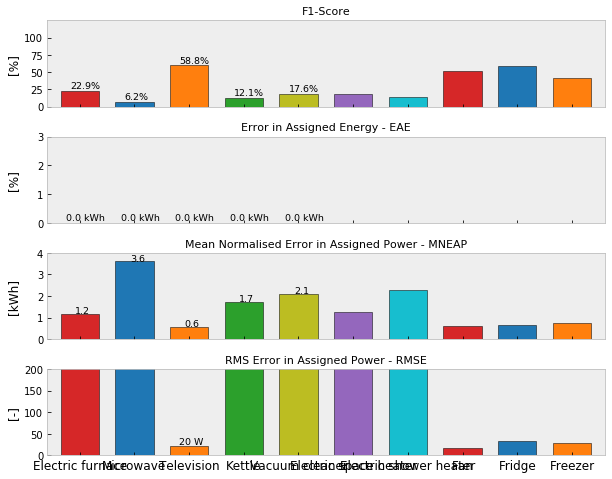

In [41]:
rcParams['figure.figsize'] = (10, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})
#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']
colors=['tab:red','tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']
c=0

for ax in fig.get_axes():
    df=pd.DataFrame(m['60s'][1][cols[c]])
    df[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, color=colors)
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1


ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})

fig.align_ylabels([(ax2,ax3,ax4,ax5)])

ax2.set(ylim=(0,125))
ax3.set(ylim=(0,1))
ax4.set(ylim=(0,0.7))
ax5.set(ylim=(0,110))

ax2.set_yticks([0,25,50,75,100])
ax3.set_yticks([0,1,2,3])
ax4.set_yticks([0,1,2,3,4])
ax5.set_yticks([0,50,100,150,200])


ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')

df=pd.DataFrame(m['60s'][5])

for x in range(5):ax2.annotate(str(round(df['F1'][x],1))+'%', xy=(x-0.18 , df['F1'][x]+4),fontsize=9.5)
for x in range(5):ax3.annotate(str(round(df['EAE'][x],1))+' kWh', xy=(x-0.25 , df['EAE'][x]+0.1),fontsize=9.5)
for x in range(5):ax4.annotate(str(round(df['MNEAP'][x],1)), xy=(x-0.08 , df['MNEAP'][x]+0.03),fontsize=9.5)
for x in range(5):ax5.annotate(str(round(df['RMSE'][x]))+' W', xy=(x-0.18 , df['RMSE'][x]+5),fontsize=9.5)

plt.savefig('./data/images/5.9_Metrics_FHMM_60min_median.svg', bbox_inches='tight', transparent=True)

In [42]:
valid_Devices.total_energy()

Calculating total_energy for ElecMeterID(instance=11, building=1, dataset='dsualmh') ...   ElecMeterID(instance=6, building=1, dataset='dsualmh') ...   

reactive    0.027865
active      0.937734
apparent    0.942451
dtype: float64

In [43]:
valid_Devices.energy_per_meter()

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, dsualmh)","(3, 1, dsualmh)","(4, 1, dsualmh)","(5, 1, dsualmh)","(6, 1, dsualmh)","(7, 1, dsualmh)","(8, 1, dsualmh)","(9, 1, dsualmh)","(10, 1, dsualmh)","(11, 1, dsualmh)"
active,0.257866,0.041748,0.014156,0.132361,0.047653,0.274218,0.118968,0.010864,0.023874,0.016026
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replicando el entrenamiento del modelo

In [44]:
from nilmtk import DataSet
from nilmtk.legacy.disaggregate import FHMM


train = DataSet('dsualmh.h5')

train.set_window(start="2023-03-07 11:10:38", end="2023-03-07 12:10:00")

train_elec=train.buildings[1].elec 

#dispositivos a entrenar: 
train_Devices=train_elec.select(instance=[2,3,4,5,6,7,8,9,10,11])



#entrenamiento y exportación del modelo
FHMM_30s_median=FHMM()
FHMM_30s_median.MIN_CHUNK_LENGTH=1
FHMM_30s_median.train(train_Devices,
                        num_states_dict={}, #en otro caso: { }
                        ac_type='active',
                        sample_period=1800,
                        resample_kwargs={'how':'median'})



print('\n\nDone!')


Training model for submeter 'ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='

In [45]:
from nilmtk.legacy.disaggregate import FHMM
FHMM=FHMM()
#FHMM.import_model('C:/data/FHMM_30s_median_model.pickle') 
print('Oven: '+str(FHMM_30s_median.individual[valid_Devices[2]].means_))
print('Microwave: '+str(FHMM_30s_median.individual[valid_Devices[3]].means_))
print('Television: '+str(FHMM_30s_median.individual[valid_Devices[4]].means_))
print('Kettle: '+str(FHMM_30s_median.individual[valid_Devices[5]].means_))
print('Vacuum Cleaner: '+str(FHMM_30s_median.individual[valid_Devices[6]].means_))

print('electric space heater: '+str(FHMM_30s_median.individual[valid_Devices[7]].means_))
print('electric shower heater: '+str(FHMM_30s_median.individual[valid_Devices[8]].means_))
print('Fan: '+str(FHMM_30s_median.individual[valid_Devices[9]].means_))
print('Fridge: '+str(FHMM_30s_median.individual[valid_Devices[10]].means_))
print('Freezer: '+str(FHMM_30s_median.individual[valid_Devices[11]].means_))


Oven: [[8.42022292]]
Microwave: [[6.93598286]]
Television: [[25.17810504]]
Kettle: [[8.86301327]]
Vacuum Cleaner: [[6.55046384]]
electric space heater: [[8.58766969]]
electric shower heater: [[390.96100966]]
Fan: [[8.19169585]]
Fridge: [[9.16555341]]
Freezer: [[8.20585855]]


In [46]:
FHMM_30s_median.model

GaussianHMM(covariance_type='full')

In [47]:
FHMM_30s_median.individual

OrderedDict([(ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', i